<a href="https://colab.research.google.com/github/nv-hiep/ML/blob/main/Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.io import loadmat

%matplotlib inline

In [ ]:
datapath1 = "ex6data1.mat"
datapath2 = "ex6data2.mat"
datapath3 = "ex6data3.mat"

data_spam_train = "spamTrain.mat"
data_spam_test  = "spamTest.mat"

In [ ]:
def _plot(X, y, xlabel, ylabel, axes = None, show=False):
  plt.rcParams['figure.figsize'] = (12., 8.)
  positive = y[:,0] == 1
  negative = y[:,0] == 0

  if axes == None:
    axes = plt.gca()
  axes.scatter(X[positive][:,0], X[positive][:,1], marker='o', s=60, c='r', label='Positive')
  axes.scatter(X[negative][:,0], X[negative][:,1], marker='o', s=60, c='k', label='Negative')

  axes.set_xlabel(xlabel, fontsize=20)
  axes.set_ylabel(ylabel, fontsize=20)

  axes.legend(bbox_to_anchor=(1,1), fancybox=True)

  if show:
    plt.show()

# SVM with small regularization parameter

In [ ]:
dat = loadmat(datapath1)
X = dat['X']
y = dat['y']

print(X.shape)
print(y.shape)

(51, 2)
(51, 1)


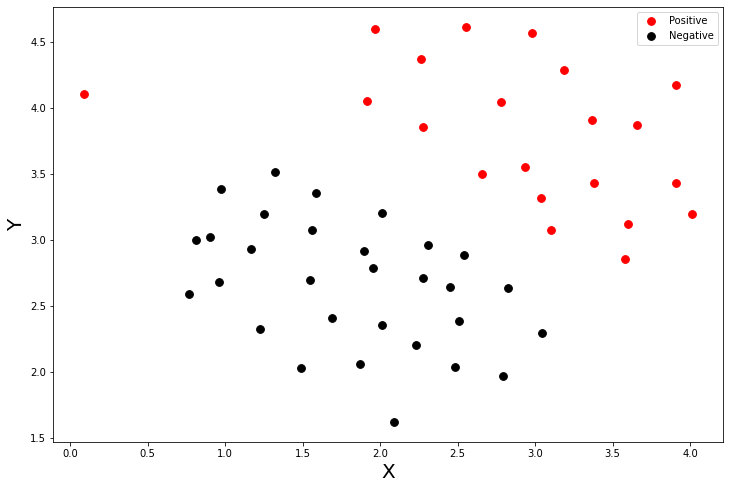

In [ ]:
_plot(X, y, 'X', 'Y', show=True)

In [ ]:
from sklearn import svm

In [ ]:
# Classifier, use C=1
# OvO or OvR would give the same results, because we have only 2 classes
svc_clf = svm.SVC(kernel='linear', C=1., decision_function_shape='ovo')
svc_clf.fit(X, y.ravel())

SVC(decision_function_shape='ovo', kernel='linear')

In [ ]:
svc_clf

SVC(decision_function_shape='ovo', kernel='linear')

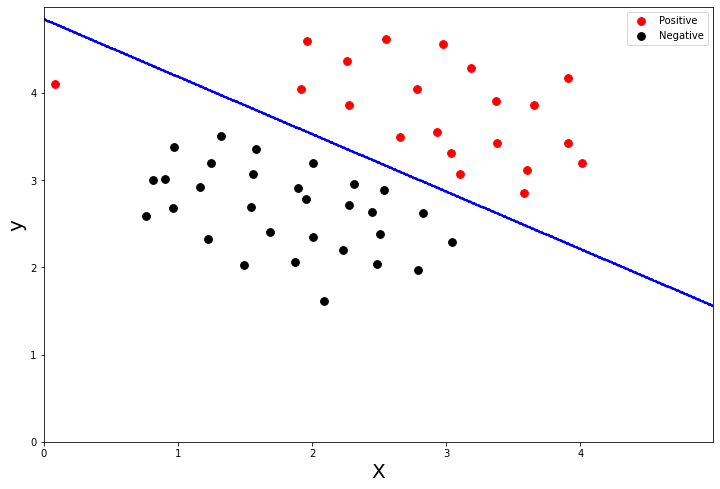

In [ ]:
# Plot
_plot(X, y, 'X', 'y', show=False)

# Plot hyperplane
x1, x2 = np.meshgrid(np.arange(0., 5., 0.01), np.arange(0., 5., 0.01))
Z = svc_clf.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)

plt.contour(x1, x2, Z, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], colors='b')
plt.show()

# SVM with large regularization paramter

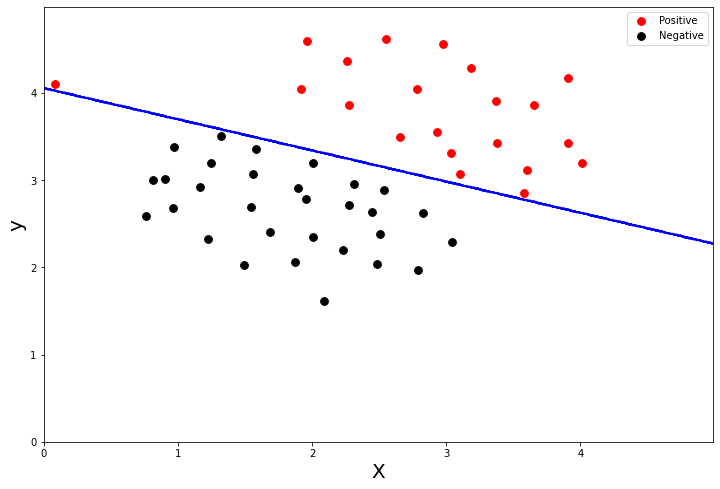

In [ ]:
# Classifier, use C=100
svc_clf = svm.SVC(kernel='linear', C=100., decision_function_shape='ovo')
svc_clf.fit(X, y.ravel())

# Plot
_plot(X, y, 'X', 'y', show=False)

# Plot hyperplane
x1, x2 = np.meshgrid(np.arange(0., 5., 0.01), np.arange(0., 5., 0.01))
Z = svc_clf.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)

plt.contour(x1, x2, Z, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], colors='b')
plt.show()

The model tried to correctly classify the outlier point, but it may overfit, and would not generalize well. So, the previous model would be better.

# SVM with non-linear boundary

In [ ]:
dat = loadmat(datapath2)
X = dat['X']
y = dat['y']

print(X.shape)
print(y.shape)

(863, 2)
(863, 1)


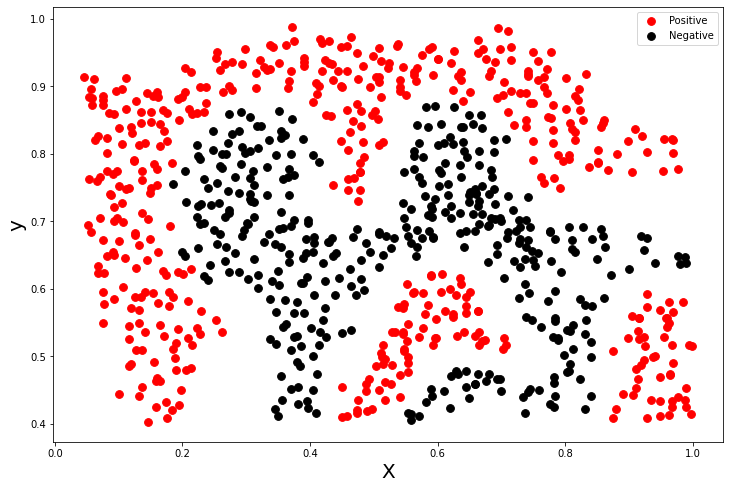

In [ ]:
# Plot data
_plot(X, y, 'X', 'y', show=True)

We will use the RBF function, with gamma parameter that defines how for the influence of a data point reaches. Low gamma means very far, high gamma value means close. We'll express gamma as a function of sigma.

In [ ]:
sigma = 0.1
gamma = 1. / (2.*sigma**2)

svc_clf = svm.SVC(kernel='rbf', gamma=gamma, C=1., decision_function_shape='ovo')
svc_clf.fit(X, y.ravel())

SVC(decision_function_shape='ovo', gamma=49.99999999999999)

(175000,)
(350, 500)
(350, 500)


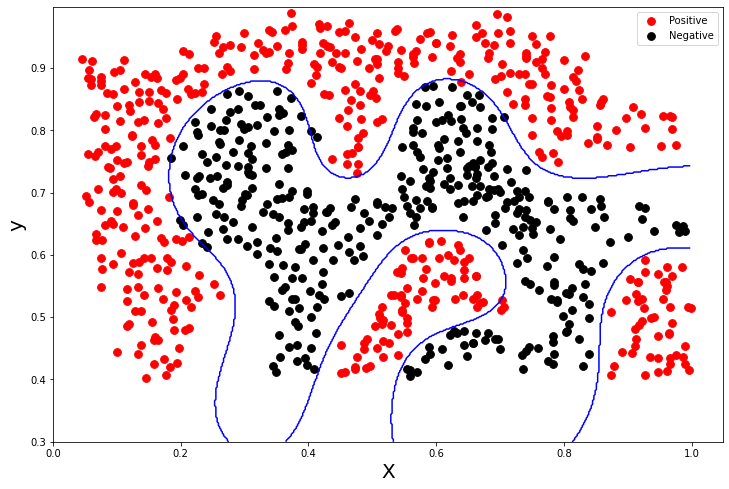

In [ ]:
# Plot
_plot(X, y, 'X', 'y', show=False)

x1, x2 = np.meshgrid( np.arange(0., 1., 0.002), np.arange(0.3, 1., 0.002) )
Z = svc_clf.predict(np.c_[ x1.ravel(), x2.ravel() ])
print(Z.shape)
Z = Z.reshape(x1.shape)
print(x1.shape)
print(x2.shape)
plt.contour(x1, x2, Z, [0.5], colors='b')
plt.show()

# SVM with cross-validation

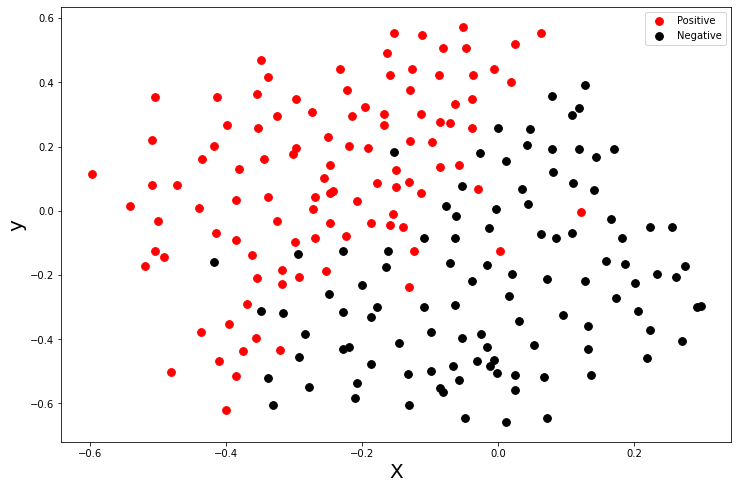

In [ ]:
dat = loadmat(datapath3)

X = dat['X']
y = dat['y']

_plot(X, y, 'X', 'y', show=True)

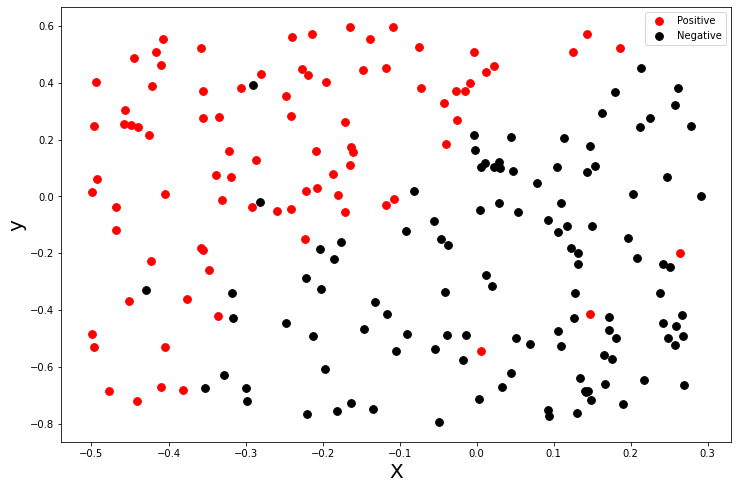

In [ ]:
# Validation set
Xval = dat['Xval']
yval = dat['yval']

_plot(Xval, yval, 'X', 'y', show=True)

In [ ]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

errors = []
sigma_c = []

for sig in sigma:
  for cx in C:
    clf = svm.SVC(kernel='rbf', gamma=1. / (2.*sig**2), C=cx, decision_function_shape='ovr')
    clf.fit(X, y.ravel())
    errors.append( clf.score(Xval, yval.ravel()) )
    sigma_c.append( (sig, cx) )

In [ ]:
print(errors)

[0.435, 0.435, 0.435, 0.435, 0.605, 0.62, 0.62, 0.62, 0.435, 0.435, 0.435, 0.755, 0.905, 0.89, 0.89, 0.89, 0.435, 0.45, 0.945, 0.96, 0.965, 0.965, 0.94, 0.94, 0.435, 0.86, 0.91, 0.925, 0.965, 0.945, 0.955, 0.96, 0.435, 0.62, 0.825, 0.89, 0.925, 0.93, 0.935, 0.925, 0.435, 0.435, 0.435, 0.74, 0.845, 0.89, 0.92, 0.925, 0.435, 0.435, 0.435, 0.435, 0.435, 0.72, 0.845, 0.89, 0.435, 0.435, 0.435, 0.435, 0.435, 0.435, 0.435, 0.74]


In [ ]:
idx = np.argmax(errors)

sigma_sel, C_sel = sigma_c[idx]
print(f"The optimal values of Sigma and C are {sigma_sel, C_sel}")

The optimal values of Sigma and C are (0.1, 1)


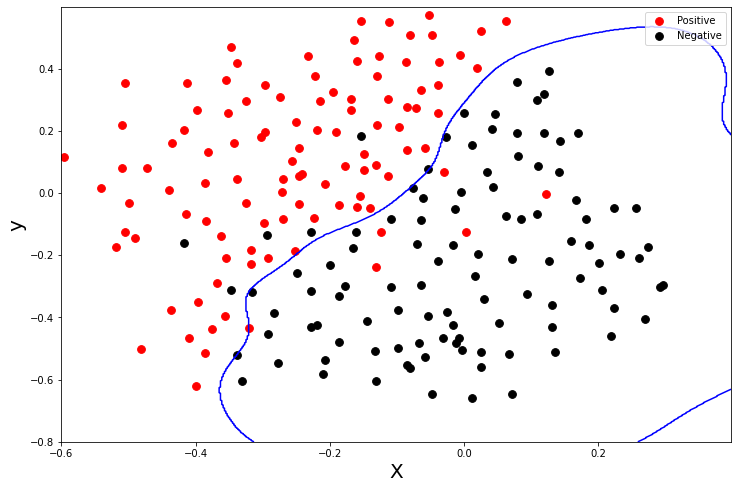

In [ ]:
sigma = 0.1
gamma = 1. / (2.*sigma**2)
C = 1.

svc_clf = svm.SVC(kernel='rbf', gamma=gamma, C = C, decision_function_shape='ovr')
svc_clf.fit(X, y.ravel())

_plot(X, y, 'X', 'y', show=False)

x1, x2 = np.meshgrid( np.arange(-0.6, 0.4, 0.002), np.arange(-0.8, 0.6, 0.002) )
Z = svc_clf.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)

plt.contour(x1, x2, Z, [0.5], colors='b')
plt.show()

# Spam classification

In [ ]:
spam_train = loadmat(data_spam_train)
spam_test = loadmat(data_spam_test)

X_train = spam_train['X']
y_train = spam_train['y']
print(X_train.shape)
print(y_train.shape)

X_test = spam_test['Xtest']
y_test = spam_test['ytest']
print(X_test.shape)
print(y_test.shape)

(4000, 1899)
(4000, 1)
(1000, 1899)
(1000, 1)


## Linear kernel

In [ ]:
C = 0.1

clf_spam = svm.SVC(kernel = 'linear', C = C, decision_function_shape = 'ovr')
clf_spam.fit(X_train, y_train.ravel())

train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
test_acc = clf_spam.score(X_test, y_test.ravel())

print(f'Training accuracy = {train_acc * 100}')
print(f'Test accuracy = {test_acc * 100}')

Training accuracy = 99.825
Test accuracy = 98.9


In [ ]:
C = 1.

clf_spam = svm.SVC(kernel = 'linear', C = C, decision_function_shape = 'ovr')
clf_spam.fit(X_train, y_train.ravel())

train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
test_acc = clf_spam.score(X_test, y_test.ravel())

print(f'Training accuracy = {train_acc * 100}')
print(f'Test accuracy = {test_acc * 100}')

Training accuracy = 99.97500000000001
Test accuracy = 97.8


## RBF kernel

In [ ]:
C = 0.1

clf_spam = svm.SVC(kernel = 'rbf', C = C, decision_function_shape = 'ovr')
clf_spam.fit(X_train, y_train.ravel())

train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
test_acc = clf_spam.score(X_test, y_test.ravel())

print(f'Training accuracy = {train_acc * 100}')
print(f'Test accuracy = {test_acc * 100}')

Training accuracy = 93.425
Test accuracy = 94.0


In [ ]:
C = 1.

clf_spam = svm.SVC(kernel = 'rbf', C = C, decision_function_shape = 'ovr')
clf_spam.fit(X_train, y_train.ravel())

train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
test_acc = clf_spam.score(X_test, y_test.ravel())

print(f'Training accuracy = {train_acc * 100}')
print(f'Test accuracy = {test_acc * 100}')

Training accuracy = 99.325
Test accuracy = 98.7
